In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import split
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from collections import defaultdict

%matplotlib inline
sns.set(style="darkgrid",color_codes=True)

In [2]:
#Importing the data in data frame
df1 = pd.read_csv (r'C:\Users\reach\Dropbox\PC\Downloads\data\data\txn.csv')
print (df1)

         CustomerId CustomerEmailAddress CustomerGender  CustomerAge  \
0        Q8RV5E9KFX     bilhgbg@mail.com           Male           48   
1        Q8RV5E9KFX     bilhgbg@mail.com           Male           48   
2        Q8RV5E9KFX     bilhgbg@mail.com           Male           48   
3        Q8RV5E9KFX     bilhgbg@mail.com           Male           48   
4        Q8RV5E9KFX     bilhgbg@mail.com           Male           48   
5        Q8RV5E9KFX     bilhgbg@mail.com           Male           48   
6        Q8RV5E9KFX     bilhgbg@mail.com           Male           48   
7        Q8RV5E9KFX     bilhgbg@mail.com           Male           48   
8        Q8RV5E9KFX     bilhgbg@mail.com           Male           48   
9        Q8RV5E9KFX     bilhgbg@mail.com           Male           48   
10       Q8RV5E9KFX     bilhgbg@mail.com           Male           48   
11       Q8RV5E9KFX     bilhgbg@mail.com           Male           48   
12       Q8RV5E9KFX     bilhgbg@mail.com           Male         

In [3]:
def f(row):
    if row['OrderStatus'] == "Item Returned":
        val = 1
    elif row['OrderStatus'] == "Delivered":
        val = 4
    elif row['OrderStatus'] == "Payment Incomplete":
        val = 2
    else:
        val = 3
    return val

In [4]:
df1['Ratings'] = df1.apply(f, axis=1)

In [5]:
df2=df1.drop(['OrderDate'], axis = 1)

In [6]:
## count of each attribute in the dataset

unique_users =len(np.unique(df2.CustomerId))
unique_pdts = len(np.unique(df2.Product))
print('Total number of users is: ',unique_users,'\n')
print('Total number of products is: ',unique_pdts,'\n')

Total number of users is:  100000 

Total number of products is:  79 



In [7]:
### lets analyse the spread of data
df2.describe().Ratings

count    1.754515e+06
mean     2.499487e+00
std      1.117415e+00
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      4.000000e+00
Name: Ratings, dtype: float64

In [8]:
a=df2.groupby('Ratings')['Ratings'].count()

In [9]:
# Attributes in the Group
Atr1g1='CustomerId'
Atr2g1='Product'
Atr3g1='Ratings'
data=df2

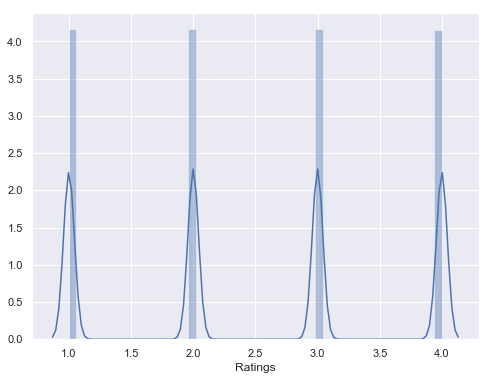

In [10]:
##EDA: Spread
# fig, ax = plt.subplots(1,2,figsize=(16,8)) 
plt.figure(figsize=(8,6))
sns.distplot(data[Atr3g1]);

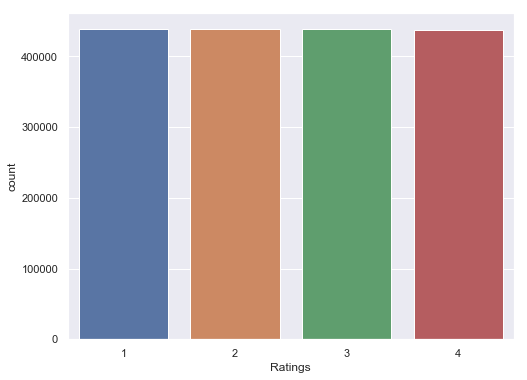

In [11]:
# EDA: count of ratings:
plt.figure(figsize=(8,6))
sns.countplot(data[Atr3g1]);

In [12]:
t2data=df2.copy()
t2data = t2data[t2data.groupby('CustomerId')['CustomerId'].transform('size') > 5]
t2data=pd.DataFrame(t2data)

In [13]:
t2data=t2data.reset_index(drop=True)

In [14]:
t2data.head()

,CustomerId,CustomerEmailAddress,CustomerGender,CustomerAge,CustomerDeviceType,OrderId,OrderAmount,Product,OrderStatus,DeliveryPinCode,OrderPaymentMode,Ratings
0,Q8RV5E9KFX,bilhgbg@mail.com,Male,48,iOS,398629,10000,Google Home,Item Returned,560034,net_banking,1
1,Q8RV5E9KFX,bilhgbg@mail.com,Male,48,iOS,2593111,5000,Dreams11 Gift Card,Item Returned,110001,credit_card,1
2,Q8RV5E9KFX,bilhgbg@mail.com,Male,48,iOS,2244234,500,sleepers,Item Returned,400050,upi,1
3,Q8RV5E9KFX,bilhgbg@mail.com,Male,48,iOS,9622013,25000,Vedantu Gift Card,Delivered,110025,wallet,4
4,Q8RV5E9KFX,bilhgbg@mail.com,Male,48,iOS,8419436,5000,Sun Glasses,Item Returned,110025,credit_card,1


In [15]:
shape_t2data=t2data.shape
print('The shape of the new dataframe is',shape_t2data,'which means there are',shape_t2data[0],'rows of ratings and',shape_t2data[1],'attributes of userid, productid and rating.')

The shape of the new dataframe is (1672375, 12) which means there are 1672375 rows of ratings and 12 attributes of userid, productid and rating.


In [16]:
## lets check the count of ratings given by the users
ratings_per_user = t2data.groupby(by='CustomerId')['Ratings'].count().sort_values(ascending=False)
ratings_per_user

CustomerId
8ZDLX1HNO6    30
QLI4DKSHGR    30
9DMO375JV4    30
9DJK0F52LO    30
9DHPLBKJRE    30
9DE1VHAXQR    30
QLD6A72OSI    30
QLF8YC2DKE    30
QLG6Z5C8N2    30
9D74WGHO5J    30
QLHXAZ26BS    30
9D507RPZQI    30
9CH382BZ5I    30
9D4EWTAO0K    30
9D4650NLFR    30
QLP1FE8O69    30
QLR0DMSKIC    30
9CNPKEBO8A    30
9CM4S217T5    30
QLZJ4NSVD3    30
QLZR6K2MBE    30
9CH57Q20ZN    30
9DPCIY40XK    30
QL86EPZBOD    30
QL81DFCI32    30
QL5MYHR7GA    30
QKIRPMNG35    30
9EJ53KN0QT    30
QKMT5OPD98    30
9EI2MTAYC6    30
              ..
TU9ASPKCJ0    10
D9BQVLCW0N    10
TU6L4A2NB5    10
TU4HD3SQ5M    10
D9B3G1JVAN    10
MPNACW2SH5    10
MPR8HAIU4F    10
MPSCBEOW7L    10
MPTVIUC1LJ    10
D97A3W2FEH    10
D9K67GLN3E    10
61O2FAJRCY    10
DA1S5KEY07    10
D9Q1W0SE6J    10
MOX8LPCKR3    10
61FNDG4UPW    10
TUP4MG215Q    10
61I0XS2VQF    10
TULY6BNPV4    10
61ICFZHY2W    10
61IDCTYSUH    10
TUL34QAXMV    10
D9WKQSI80U    10
61KEVYFWPC    10
D9WE7QVF08    10
D9TACOIJK5    10
D9T3ZJR1EF    10
MP9

In [17]:
reader = Reader(rating_scale=(1, 4))

In [18]:
t3data=Dataset.load_from_df(t2data[['CustomerId','Product','Ratings']],reader)
t3data

In [19]:
trainset, testset = train_test_split(t3data, test_size=.30, random_state=1)

In [20]:
print(type(testset))
print(type(trainset))

<class 'list'>
<class 'surprise.trainset.Trainset'>


In [21]:
# First we will group by product ids and then display mean ratings for the products. For better visualization we will display first 5 records.
t2data.groupby('Product')['Ratings'].mean().head()

Product
Agoda Voucher               2.493086
Alexa                       2.502296
Bharat Petroleum Voucher    2.496460
BookMyShow Gift Card        2.498688
Byju Gift Card              2.505046
Name: Ratings, dtype: float64

In [22]:
t2data.groupby('Product')['Ratings'].mean().sort_values(ascending=False).head(10)

Product
hand bag           2.516075
books              2.514817
Speakers           2.511672
Luxury watch       2.511638
Sun Glasses        2.509058
Television         2.508837
Metal Furniture    2.508470
laptop             2.507034
saree              2.506476
Router             2.506296
Name: Ratings, dtype: float64

In [23]:
t2data.groupby('Product')['Ratings'].count().sort_values(ascending=False).head()

Product
Usb Stick                  41653
Smart Lights               21203
passport bag               21175
Kindle                     21153
Hotel Marriot Gift Card    21111
Name: Ratings, dtype: int64

In [24]:
t2data_product_ratings =pd.DataFrame(t2data.groupby('Product')['Ratings'].mean())
t2data_product_ratings['ratings_count'] = pd.DataFrame(t2data.groupby('Product')['Ratings'].count())
t2data_product_ratings.head()

,Ratings,ratings_count
Product,,
Agoda Voucher,2.493086,21045
Alexa,2.502296,20904
Bharat Petroleum Voucher,2.496460,20904
BookMyShow Gift Card,2.498688,20961
Byju Gift Card,2.505046,21006


In [25]:
t2data_product_ratings.sort_values(by='ratings_count',ascending=False)

,Ratings,ratings_count
Product,,
Usb Stick,2.499724,41653
Smart Lights,2.483234,21203
passport bag,2.488406,21175
Kindle,2.503569,21153
headphone,2.496187,21111
Hotel Marriot Gift Card,2.505992,21111
Gold Jewelley,2.501778,21093
Ola Cash Card,2.503297,21081
notepad,2.501447,21077


In [26]:
t2data_product_ratings['score'] = t2data_product_ratings['Ratings']*t2data_product_ratings['ratings_count']

<Figure size 576x432 with 0 Axes>

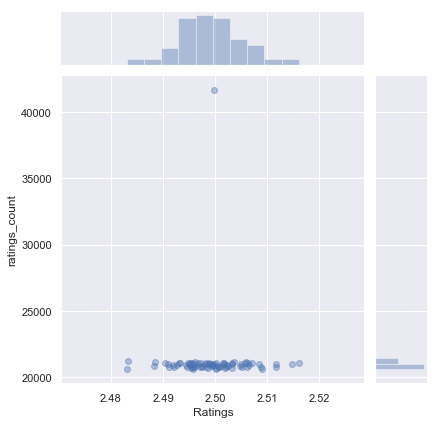

In [27]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Ratings', y='ratings_count', data=t2data_product_ratings, alpha=0.4)

In [28]:
t2data_product_ratings.sort_values(by='score',ascending=False)

,Ratings,ratings_count,score
Product,,,
Usb Stick,2.499724,41653,104121.0
hand bag,2.516075,21057,52981.0
Kindle,2.503569,21153,52958.0
Hotel Marriot Gift Card,2.505992,21111,52904.0
books,2.514817,20990,52786.0
Ola Cash Card,2.503297,21081,52772.0
Gold Jewelley,2.501778,21093,52770.0
Luxury watch,2.511638,21009,52767.0
laptop,2.507034,21040,52748.0


In [29]:
print('the top 10 recommendations are:') 
t2data_product_ratings.sort_values(by='score',ascending=False).head(10)

the top 10 recommendations are:


,Ratings,ratings_count,score
Product,,,
Usb Stick,2.499724,41653,104121.0
hand bag,2.516075,21057,52981.0
Kindle,2.503569,21153,52958.0
Hotel Marriot Gift Card,2.505992,21111,52904.0
books,2.514817,20990,52786.0
Ola Cash Card,2.503297,21081,52772.0
Gold Jewelley,2.501778,21093,52770.0
Luxury watch,2.511638,21009,52767.0
laptop,2.507034,21040,52748.0


In [30]:
### Lets build the model - Build Collaborative Filtering model

In [31]:
data = t3data

In [32]:
trainset, testset = train_test_split(t3data, test_size=.30, random_state=1)

In [33]:
reader = Reader(rating_scale=(1, 4))

In [34]:
surp_data=Dataset.load_from_df(t3data[['CustomerID','Product','Ratings']],reader)
surp_data

TypeError: 'DatasetAutoFolds' object is not subscriptable

In [ ]:
print(type(testset))
print(type(trainset))

In [ ]:
user_ratings=trainset.ur
type(user_ratings)

In [ ]:
for keys in user_ratings.keys():
    print(keys)

In [ ]:
#For first user
#These are inner ids

user_ratings[0]

In [ ]:
# However the ids are the inner ids and not the raw ids
# raw ids can be obatined as follows

#Convert a user inner id to a raw id.
print(trainset.to_raw_uid(0))

#Convert an item inner id to a raw id.
print(trainset.to_raw_iid(0))

In [ ]:
knn_model = KNNWithMeans(k=10,sim_options={'name':'cosine' , 'user_based':False})
knn_model.fit(trainset)

#Item Item similarity matrix has been created now

In [ ]:
len(testset)

In [ ]:
#Evaluation on testset

test_pred_knn=knn_model.test(testset)

# compute RMSE
accuracy.rmse(test_pred_knn)

In [ ]:
#Lets predict for 11th one

test_pred_knn[10]

In [ ]:
#Convert result to DF

test_pred_df = pd.DataFrame(test_pred_knn)
test_pred_df

In [ ]:
#was_impossible=false: are only calculated

testset_new = trainset.build_anti_testset()
len(testset_new)

In [ ]:
#Lets fetch top 5 values

testset_new[0:5]

In [ ]:
predictions = knn_model.test(testset_new)

In [ ]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [ ]:
predictions_df.head()

In [ ]:
predictions_df.columns = ["CustomerID","Product","Est_rating"]
predictions_df.sort_values(by = ["CustomerID","Product", "Est_rating"],ascending=False,inplace=True)

In [ ]:
predictions_df.head()

In [ ]:
#Representing top 5 Recommendations for each Customers


top_5_recos = predictions_df.groupby("CustomerID").head(5).reset_index(drop=True)
top_5_recos

In [ ]:
#No of ratings for each Item

item_group = df2.groupby(['Product']).agg({'Ratings' : 'count'}).reset_index()
item_group.head()

In [ ]:
#Rating's total

grouped_sum = item_group['Ratings'].sum()
print(grouped_sum)

#Thus we have a rating sum of 43309 

In [ ]:
item_group['Percentage'] = item_group['Ratings'].div(grouped_sum)*100

In [ ]:
item_group.sort_values(['Ratings'], ascending = False)

In [ ]:
train_data, test_data = train_test_split(df2, test_size = 0.3, random_state = 1)

In [ ]:
#Class for Popularity based Recommender System model
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

        #Get a count of user_ids for each unique song as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'CustomerId': 'score'},inplace=True)
    
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)

    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['CustomerId'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations


In [ ]:
pm = popularity_recommender_py()

In [ ]:
pm.create(train_data,'CustomerId','Product')

In [ ]:
customers = df2['CustomerId'].unique()
len(customers)

In [ ]:
items = df2['Product'].unique()
len(items)

In [ ]:
#Find Recommendation for a particular Customer

cust_id=customers()
pm.recommend(cust_id)


#This represents the top 10 items recommended for the customer ""